In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial.distance import euclidean
from time import time
from sklearn.metrics import roc_auc_score

### Generate Points

In [2]:
NUM_TOTAL_POINTS = 200
NUM_POS_PAIRS = 4
N_DIM = 2

sigma = 1.0
nu = 0.5

In [3]:
def sample(mean=0, std=1, dim=N_DIM):
    return np.random.normal(loc=mean, scale=std, size=dim)

In [4]:
points = []
GT_POS_PAIRS = []
labels = []

for i in range(NUM_POS_PAIRS):
    mid = sample(std=sigma)
    dis = sample(std=nu)
    
    points.append(mid - dis)
    points.append(mid + dis)
    
    labels.append(i + 1)
    labels.append(i + 1)
    GT_POS_PAIRS.append((2* i, 2* i + 1))
    
for i in range(NUM_TOTAL_POINTS - 2* NUM_POS_PAIRS):
    points.append(sample())
    labels.append(0)
    
points = np.stack(points)

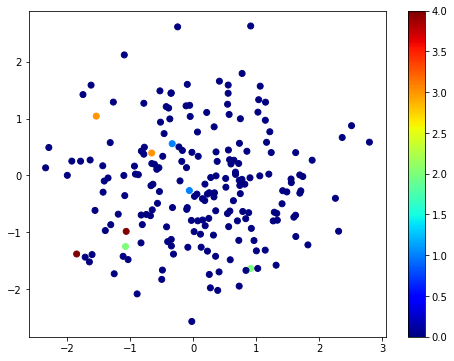

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='jet')
plt.colorbar()
plt.show()

### Find Pairs

In [6]:
test_mean = np.mean(points, axis=0)
print test_mean
test_std = np.std(points, axis=0)
print test_std

[ 0.10138709 -0.15486409]
[1.01187758 0.96740372]


In [7]:
GT_POS_PAIRS

[(0, 1), (2, 3), (4, 5), (6, 7)]

In [8]:
start = time()

LR_arr = []
LR_idx = []

for i in np.arange(points.shape[0]):
    for j in np.arange(i, points.shape[0]):
        midpoint = 0.5 * (points[i] + points[j])
        m = euclidean(midpoint, test_mean)
        d = euclidean(0.5* (points[i] - points[j]), [0,0])
        
        m_prime = m / sigma
        d_prime = d / sigma
        t = nu / sigma
        
        LR = np.power(0.5/t, N_DIM)* np.exp(0.5*(np.power(m_prime,2)+ np.power(d_prime,2)*(2- np.power(t,-2))))
        LR_arr.append(LR)
        
        if (i, j) in GT_POS_PAIRS:
            LR_idx.append(True)
        else:
            LR_idx.append(False)
            
print 'time elapsed: %f s' % (time() - start)

LR_arr = np.array(LR_arr)
LR_idx = np.array(LR_idx)

time elapsed: 1.963585 s


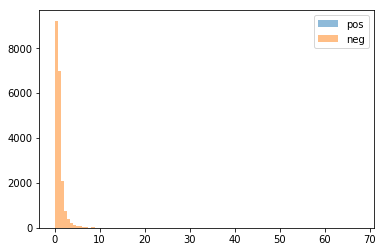

In [10]:
bins = np.linspace(LR_arr.min(), LR_arr.max(), 100)

plt.hist(LR_arr[LR_idx], bins, alpha=0.5, label='pos')
plt.hist(LR_arr[LR_idx == False], bins, alpha=0.5, label='neg')
plt.legend(loc='upper right')
plt.show()

In [11]:
print roc_auc_score(y_true=LR_idx, y_score=LR_arr)

0.7655130374203821
